In [1]:
from collections import defaultdict
from dataclasses import dataclass
import os
import glob

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def text_2_bool(s: str) -> bool:
    if s == "True":
        return True
    if s == "False":
        return False
    
    raise ValueError(f"expected bool; got '{s}'")


@dataclass
class Exp:
    dataset: str
    model: str
    pretrained: bool
    objective: str
    seed: int
    agreement_threshold: float = 0.0
    
    def __str__(self):
        if self.agreement_threshold == 0.0:
            return f"{self.dataset},{self.model},pretrained={self.pretrained},objective={self.objective},seed={self.seed}"
        
        return f"{self.dataset},{self.model},pretrained={self.pretrained},objective={self.objective},agreement_threshold={self.agreement_threshold},seed={self.seed}"
    
    @classmethod
    def from_folder_name(cls, name: str):
        parts = name.split(",")
        if len(parts) not in [5, 6] or not parts[2].startswith("pretrained=") or not parts[3].startswith("objective=") or not parts[-1].startswith("seed="):
            raise ValueError(f"weird name '{name}'")
            
        if len(parts) == 5:
            return cls(parts[0], parts[1], text_2_bool(parts[2][len("pretrained="):]), parts[3][len("objective="):], int(parts[-1][len("seed="):]))
        
        if not parts[4].startswith("agreement_threshold="):
            raise ValueError(f"weird name '{name}'")
        
        return cls(parts[0], parts[1], text_2_bool(parts[2][len("pretrained="):]), parts[3][len("objective="):], int(parts[-1][len("seed="):]), float(parts[4][len("agreement_threshold="):]))
    
    @property
    def train_loss_path(self):
        return os.path.join("results", str(self), "train_loss.csv")
    
    @property
    def val_loss_path(self):
        return os.path.join("results", str(self), "val_loss.csv")
    
    @property
    def val_acc_path(self):
        return os.path.join("results", str(self), "val_acc.csv")
    

def get_exps(g):
    for path in g:
        yield Exp.from_folder_name(os.path.basename(path))

In [3]:
exps = []
for exp in get_exps(glob.glob("results/*")):
    exps.append(exp)
exps.sort(key=lambda x: str(x))

In [4]:
for exp in exps:
    print(exp)

celebA,resnet18,pretrained=False,objective=erm,seed=0
celebA,resnet18,pretrained=False,objective=irm,seed=0
celebA,resnet18,pretrained=True,objective=erm,seed=0
celebA,resnet18,pretrained=True,objective=irm,seed=0
celebA,resnet34,pretrained=False,objective=erm,seed=0
celebA,resnet34,pretrained=False,objective=irm,seed=0
celebA,resnet34,pretrained=True,objective=erm,seed=0
celebA,resnet34,pretrained=True,objective=irm,seed=0
celebA,resnet50,pretrained=False,objective=erm,seed=0
celebA,resnet50,pretrained=False,objective=irm,seed=0
celebA,resnet50,pretrained=True,objective=erm,seed=0
celebA,resnet50,pretrained=True,objective=irm,seed=0
celebA,vit_b_32,pretrained=False,objective=erm,seed=0
celebA,vit_b_32,pretrained=False,objective=irm,seed=0
celebA,vit_b_32,pretrained=True,objective=erm,seed=0
celebA,vit_b_32,pretrained=True,objective=irm,seed=0
celebA,vit_l_32,pretrained=False,objective=erm,seed=0
celebA,vit_l_32,pretrained=False,objective=irm,seed=0
celebA,vit_l_32,pretrained=True,obje

### ILC exps

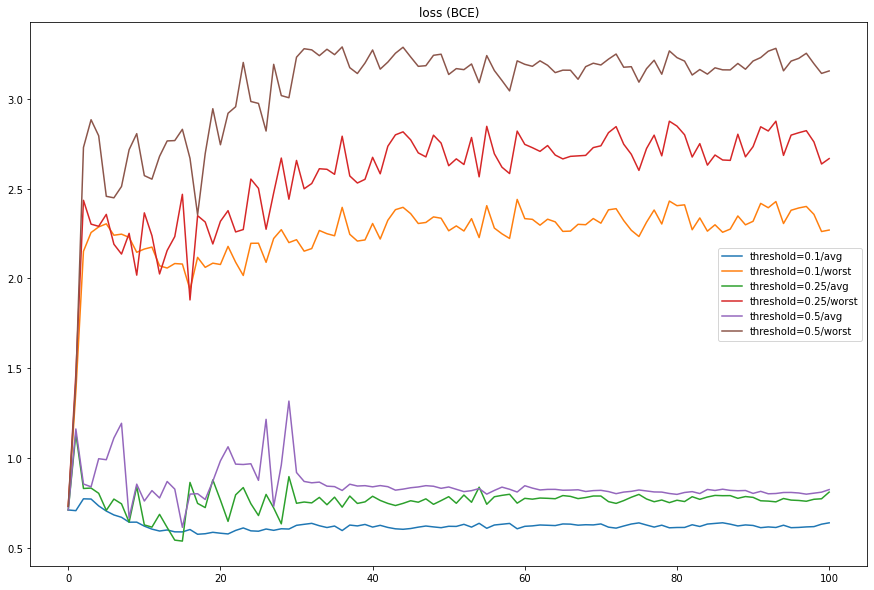

In [5]:
exps = defaultdict(dict)
for exp in get_exps(glob.glob("results/*,agreement_threshold*")):
    exps[exp.pretrained][exp.agreement_threshold] = exp

plt.figure(figsize=(15,10))
for threshold in exps[True]:
    csv = pd.read_csv(exps[True][threshold].val_loss_path)
    plt.plot(csv["epoch"], csv["avg"], label=f"threshold={threshold}/avg")
    plt.plot(csv["epoch"], csv["y = waterbird, background =  land"], label=f"threshold={threshold}/worst")
plt.legend()
plt.title("loss (BCE)")
plt.show()

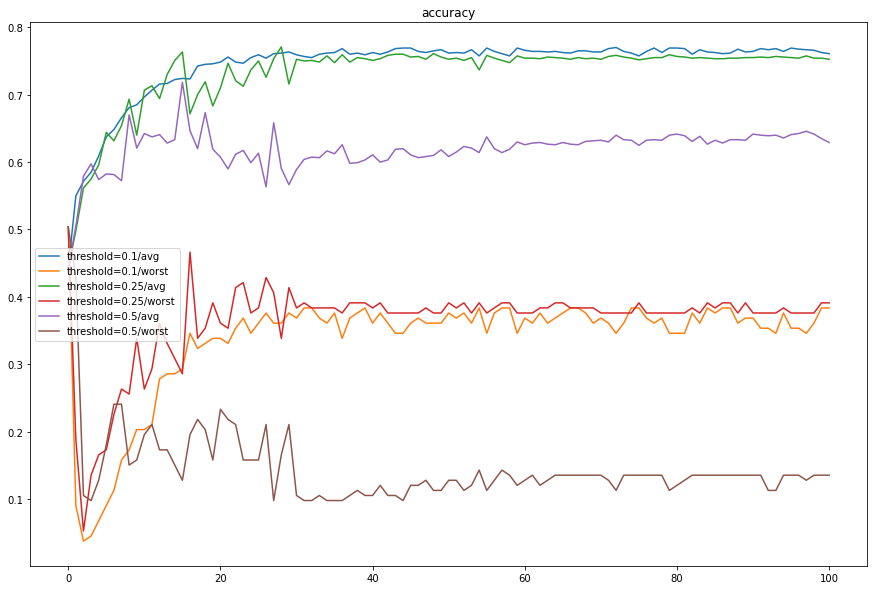

In [6]:
plt.figure(figsize=(15,10))
for threshold in exps[True]:
    csv = pd.read_csv(exps[True][threshold].val_acc_path)
    plt.plot(csv["epoch"], csv["avg"], label=f"threshold={threshold}/avg")
    plt.plot(csv["epoch"], csv["y = waterbird, background =  land"], label=f"threshold={threshold}/worst")
plt.legend()
plt.title("accuracy")
plt.show()

### ResNet scale on CelebA, ERM

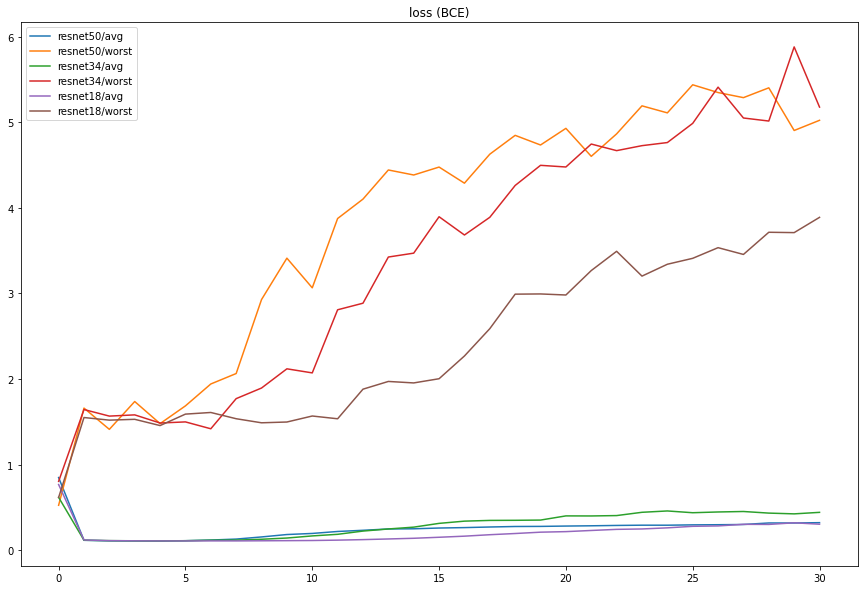

In [7]:
exps = {}
for exp in get_exps(glob.glob("results/celebA,resnet*,pretrained=True,objective=erm,seed=0")):
    size = int(exp.model[len("resnet"):])
    exps[size] = exp

plt.figure(figsize=(15,10))
for size in exps:
    csv = pd.read_csv(exps[size].val_loss_path)
    plt.plot(csv["epoch"], csv["avg"], label=f"resnet{size}/avg")
    plt.plot(csv["epoch"], csv["y =     blond, male = 1"], label=f"resnet{size}/worst")
plt.legend()
plt.title("loss (BCE)")
plt.show()

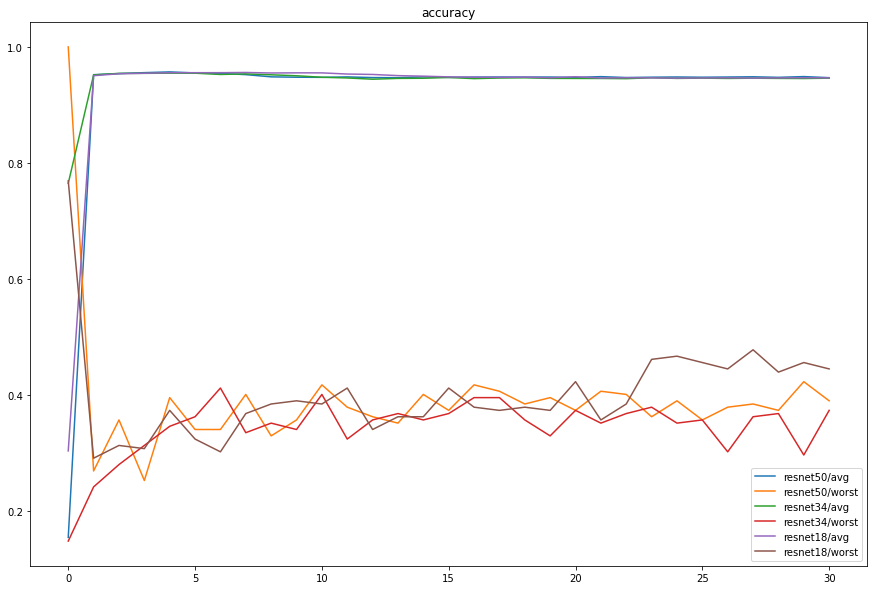

In [8]:
plt.figure(figsize=(15,10))
for size in exps:
    csv = pd.read_csv(exps[size].val_acc_path)
    plt.plot(csv["epoch"], csv["avg"], label=f"resnet{size}/avg")
    plt.plot(csv["epoch"], csv["y =     blond, male = 1"], label=f"resnet{size}/worst")
plt.legend()
plt.title("accuracy")
plt.show()